In [1]:
import sys
sys.path.insert(0, "../src")
from IPython.core import display as ICD

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
directory = "../processed_dataset"
dfs = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"): 
        data = pd.read_json(os.path.join(directory, filename)) # read data frame from json file
        dfs.append(data) # append the data frame to the list
    else:
        continue


dataset = pd.concat(dfs, ignore_index=True)
dataset.head()

,k,n,b,r,q,p,K,N,B,R,Q,P,winner
0,1,1,3,3,0,10,1,2,1,3,1,7,0.0
1,1,2,1,3,1,7,1,0,0,5,1,8,1.0
2,1,1,1,3,1,10,1,3,2,1,1,9,0.0
3,1,2,3,1,1,9,1,2,3,1,1,9,0.0
4,1,2,3,0,2,6,1,1,1,2,2,7,1.0


In [4]:
dataset = dataset[dataset["P"] <= 8]
dataset = dataset[dataset["p"] <= 8]
dataset

,k,n,b,r,q,p,K,N,B,R,Q,P,winner
1,1,2,1,3,1,7,1,0,0,5,1,8,1.0
4,1,2,3,0,2,6,1,1,1,2,2,7,1.0
7,1,2,0,2,2,7,1,1,2,1,2,8,0.0
10,1,3,2,3,0,8,1,0,2,0,3,8,0.0
13,1,2,2,2,1,8,1,3,0,1,2,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099974,1,2,0,2,2,7,1,0,2,2,2,7,1.0
2099976,1,1,1,0,3,8,1,2,2,2,1,8,0.0
2099977,1,3,1,2,1,8,1,4,0,4,0,7,-1.0
2099986,1,6,2,1,0,7,1,1,3,2,1,8,0.0


In [5]:
draws = dataset[dataset["winner"] == 0]["winner"].count()
draws

151321

In [6]:
white_wins = dataset[dataset["winner"] == 1]["winner"].count()
white_wins

290656

In [7]:
black_wins = dataset[dataset["winner"] == -1]["winner"].count()
black_wins

231575

In [8]:
total_games = draws + white_wins + black_wins
total_games

673552

In [9]:
"W/B/D: {:.2f}/{:.2f}/{:.2f}".format(float(white_wins/total_games),
                                     float(black_wins/total_games),
                                     float(draws/total_games))

'W/B/D: 0.43/0.34/0.22'

<AxesSubplot:ylabel='winner'>

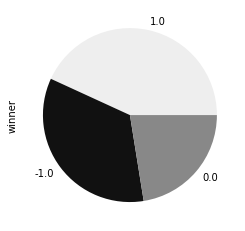

In [10]:
dataset["winner"].value_counts().plot.pie(colors=["#EEE", "#111", "#888"])

In [11]:
dataset["k"] = dataset['k'].astype(str) + "k"
dataset["n"] = dataset['n'].astype(str) + "n"
dataset["b"] = dataset['b'].astype(str) + "b"
dataset["r"] = dataset['r'].astype(str) + "r"
dataset["q"] = dataset['q'].astype(str) + "q"
dataset["p"] = dataset['p'].astype(str) + "p"
dataset["K"] = dataset['K'].astype(str) + "K"
dataset["N"] = dataset['N'].astype(str) + "N"
dataset["B"] = dataset['B'].astype(str) + "B"
dataset["R"] = dataset['R'].astype(str) + "R"
dataset["Q"] = dataset['Q'].astype(str) + "Q"
dataset["P"] = dataset['P'].astype(str) + "P"

In [12]:
dataset['white_comb'] = dataset[dataset.columns[7:12]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
dataset['black_comb'] = dataset[dataset.columns[1:6]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [13]:
dataset

,k,n,b,r,q,p,K,N,B,R,Q,P,winner,white_comb,black_comb
1,1k,2n,1b,3r,1q,7p,1K,0N,0B,5R,1Q,8P,1.0,"0N,0B,5R,1Q,8P","2n,1b,3r,1q,7p"
4,1k,2n,3b,0r,2q,6p,1K,1N,1B,2R,2Q,7P,1.0,"1N,1B,2R,2Q,7P","2n,3b,0r,2q,6p"
7,1k,2n,0b,2r,2q,7p,1K,1N,2B,1R,2Q,8P,0.0,"1N,2B,1R,2Q,8P","2n,0b,2r,2q,7p"
10,1k,3n,2b,3r,0q,8p,1K,0N,2B,0R,3Q,8P,0.0,"0N,2B,0R,3Q,8P","3n,2b,3r,0q,8p"
13,1k,2n,2b,2r,1q,8p,1K,3N,0B,1R,2Q,8P,1.0,"3N,0B,1R,2Q,8P","2n,2b,2r,1q,8p"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099974,1k,2n,0b,2r,2q,7p,1K,0N,2B,2R,2Q,7P,1.0,"0N,2B,2R,2Q,7P","2n,0b,2r,2q,7p"
2099976,1k,1n,1b,0r,3q,8p,1K,2N,2B,2R,1Q,8P,0.0,"2N,2B,2R,1Q,8P","1n,1b,0r,3q,8p"
2099977,1k,3n,1b,2r,1q,8p,1K,4N,0B,4R,0Q,7P,-1.0,"4N,0B,4R,0Q,7P","3n,1b,2r,1q,8p"
2099986,1k,6n,2b,1r,0q,7p,1K,1N,3B,2R,1Q,8P,0.0,"1N,3B,2R,1Q,8P","6n,2b,1r,0q,7p"


In [14]:
dataset = dataset[dataset.columns[12:]]

In [15]:
dataset

,winner,white_comb,black_comb
1,1.0,"0N,0B,5R,1Q,8P","2n,1b,3r,1q,7p"
4,1.0,"1N,1B,2R,2Q,7P","2n,3b,0r,2q,6p"
7,0.0,"1N,2B,1R,2Q,8P","2n,0b,2r,2q,7p"
10,0.0,"0N,2B,0R,3Q,8P","3n,2b,3r,0q,8p"
13,1.0,"3N,0B,1R,2Q,8P","2n,2b,2r,1q,8p"
...,...,...,...
2099974,1.0,"0N,2B,2R,2Q,7P","2n,0b,2r,2q,7p"
2099976,0.0,"2N,2B,2R,1Q,8P","1n,1b,0r,3q,8p"
2099977,-1.0,"4N,0B,4R,0Q,7P","3n,1b,2r,1q,8p"
2099986,0.0,"1N,3B,2R,1Q,8P","6n,2b,1r,0q,7p"


In [16]:
dataset_no_duplicates = dataset.groupby(dataset.columns.tolist(),as_index=False).size()
dataset_no_duplicates

,winner,white_comb,black_comb,size
0,-1.0,"0N,0B,0R,4Q,7P","0n,0b,0r,4q,7p",11
1,-1.0,"0N,0B,0R,4Q,7P","0n,0b,2r,3q,6p",13
2,-1.0,"0N,0B,0R,4Q,7P","0n,0b,5r,1q,8p",2
3,-1.0,"0N,0B,0R,4Q,7P","0n,1b,1r,3q,7p",33
4,-1.0,"0N,0B,0R,4Q,7P","0n,1b,3r,2q,6p",14
...,...,...,...,...
13027,1.0,"7N,0B,2R,0Q,6P","1n,1b,2r,2q,7p",1
13028,1.0,"7N,0B,2R,0Q,6P","1n,2b,1r,2q,8p",1
13029,1.0,"7N,0B,2R,0Q,6P","1n,2b,3r,1q,7p",3
13030,1.0,"7N,0B,2R,0Q,6P","2n,1b,1r,2q,8p",5


In [17]:
df_combs = dataset_no_duplicates.pivot_table(index=['white_comb', 'black_comb'], 
            columns=['winner'], values='size').fillna(0).reset_index()
df_combs.columns = ['white_comb', 'black_comb', 'black_win', 'draw', 'white_win']
df_combs

,white_comb,black_comb,black_win,draw,white_win
0,"0N,0B,0R,4Q,7P","0n,0b,0r,4q,7p",11.0,7.0,6.0
1,"0N,0B,0R,4Q,7P","0n,0b,2r,3q,6p",13.0,2.0,8.0
2,"0N,0B,0R,4Q,7P","0n,0b,5r,1q,8p",2.0,1.0,2.0
3,"0N,0B,0R,4Q,7P","0n,1b,1r,3q,7p",33.0,19.0,55.0
4,"0N,0B,0R,4Q,7P","0n,1b,3r,2q,6p",14.0,6.0,18.0
...,...,...,...,...,...
6633,"8N,1B,0R,0Q,8P","7n,1b,1r,0q,7p",0.0,1.0,0.0
6634,"9N,0B,0R,0Q,8P","1n,0b,1r,3q,7p",0.0,1.0,0.0
6635,"9N,0B,0R,0Q,8P","1n,1b,2r,2q,7p",0.0,1.0,0.0
6636,"9N,0B,0R,0Q,8P","2n,5b,2r,0q,6p",0.0,1.0,0.0


In [18]:
df_combs["total"] = df_combs["black_win"] + df_combs["white_win"] + df_combs["draw"]
df_combs

,white_comb,black_comb,black_win,draw,white_win,total
0,"0N,0B,0R,4Q,7P","0n,0b,0r,4q,7p",11.0,7.0,6.0,24.0
1,"0N,0B,0R,4Q,7P","0n,0b,2r,3q,6p",13.0,2.0,8.0,23.0
2,"0N,0B,0R,4Q,7P","0n,0b,5r,1q,8p",2.0,1.0,2.0,5.0
3,"0N,0B,0R,4Q,7P","0n,1b,1r,3q,7p",33.0,19.0,55.0,107.0
4,"0N,0B,0R,4Q,7P","0n,1b,3r,2q,6p",14.0,6.0,18.0,38.0
...,...,...,...,...,...,...
6633,"8N,1B,0R,0Q,8P","7n,1b,1r,0q,7p",0.0,1.0,0.0,1.0
6634,"9N,0B,0R,0Q,8P","1n,0b,1r,3q,7p",0.0,1.0,0.0,1.0
6635,"9N,0B,0R,0Q,8P","1n,1b,2r,2q,7p",0.0,1.0,0.0,1.0
6636,"9N,0B,0R,0Q,8P","2n,5b,2r,0q,6p",0.0,1.0,0.0,1.0


In [19]:
cutoff_count = 100

In [20]:
df_combs["white_perc"] = df_combs["white_win"]/df_combs["total"]
df_combs["black_perc"] = df_combs["black_win"]/df_combs["total"]
df_combs["draw_perc"] = df_combs["draw"]/df_combs["total"]
df_combs = df_combs.sort_values(["total"], ascending=False)
df_combs = df_combs[df_combs["total"]>=cutoff_count]
df_combs

,white_comb,black_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
3074,"2N,1B,1R,2Q,8P","1n,2b,1r,2q,8p",2041.0,681.0,2217.0,4939.0,0.448876,0.413242,0.137882
1960,"1N,2B,1R,2Q,8P","1n,2b,1r,2q,8p",1882.0,612.0,2285.0,4779.0,0.478134,0.393806,0.128060
3089,"2N,1B,1R,2Q,8P","2n,1b,1r,2q,8p",1783.0,676.0,2280.0,4739.0,0.481114,0.376240,0.142646
1975,"1N,2B,1R,2Q,8P","2n,1b,1r,2q,8p",1667.0,632.0,2432.0,4731.0,0.514056,0.352357,0.133587
3341,"2N,2B,2R,1Q,8P","2n,1b,1r,2q,8p",2211.0,440.0,1623.0,4274.0,0.379738,0.517314,0.102948
...,...,...,...,...,...,...,...,...,...
637,"0N,2B,2R,2Q,7P","1n,3b,4r,0q,7p",32.0,11.0,57.0,100.0,0.570000,0.320000,0.110000
5404,"4N,3B,0R,1Q,7P","3n,0b,1r,2q,8p",50.0,6.0,44.0,100.0,0.440000,0.500000,0.060000
3398,"2N,2B,4R,0Q,7P","0n,2b,0r,3q,8p",47.0,9.0,44.0,100.0,0.440000,0.470000,0.090000
4959,"4N,0B,2R,1Q,8P","0n,4b,2r,1q,8p",53.0,11.0,36.0,100.0,0.360000,0.530000,0.110000


In [21]:
df_combs.to_csv("df_combs.tsv", sep='\t')

In [22]:
df_combs.sort_values(["black_perc"], ascending=False)

,white_comb,black_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
4250,"3N,1B,2R,1Q,8P","1n,4b,0r,2q,6p",107.0,4.0,39.0,150.0,0.260000,0.713333,0.026667
4954,"4N,0B,2R,1Q,8P","0n,2b,2r,2q,7p",164.0,20.0,46.0,230.0,0.200000,0.713043,0.086957
4265,"3N,1B,2R,1Q,8P","2n,3b,0r,2q,6p",207.0,19.0,70.0,296.0,0.236486,0.699324,0.064189
3994,"3N,0B,1R,2Q,8P","0n,0b,2r,3q,6p",92.0,11.0,35.0,138.0,0.253623,0.666667,0.079710
4953,"4N,0B,2R,1Q,8P","0n,2b,0r,3q,8p",101.0,8.0,45.0,154.0,0.292208,0.655844,0.051948
...,...,...,...,...,...,...,...,...,...
4525,"3N,2B,3R,0Q,8P","2n,2b,2r,1q,8p",0.0,749.0,0.0,749.0,0.000000,0.000000,1.000000
5220,"4N,1B,3R,0Q,8P","2n,0b,2r,2q,7p",0.0,164.0,0.0,164.0,0.000000,0.000000,1.000000
2478,"1N,4B,3R,0Q,8P","2n,1b,3r,1q,7p",0.0,164.0,0.0,164.0,0.000000,0.000000,1.000000
4540,"3N,2B,3R,0Q,8P","3n,2b,3r,0q,8p",0.0,165.0,0.0,165.0,0.000000,0.000000,1.000000


In [23]:
df_combs.sort_values(["white_perc"], ascending=False)

,white_comb,black_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
2410,"1N,4B,0R,2Q,6P","3n,1b,2r,1q,8p",19.0,13.0,114.0,146.0,0.780822,0.130137,0.089041
2399,"1N,4B,0R,2Q,6P","2n,2b,2r,1q,8p",36.0,20.0,179.0,235.0,0.761702,0.153191,0.085106
2082,"1N,2B,3R,1Q,7P","3n,1b,4r,0q,7p",20.0,10.0,92.0,122.0,0.754098,0.163934,0.081967
20,"0N,0B,0R,4Q,7P","1n,1b,0r,3q,8p",19.0,15.0,104.0,138.0,0.753623,0.137681,0.108696
106,"0N,0B,2R,3Q,6P","1n,1b,0r,3q,8p",21.0,24.0,137.0,182.0,0.752747,0.115385,0.131868
...,...,...,...,...,...,...,...,...,...
3080,"2N,1B,1R,2Q,8P","1n,4b,3r,0q,8p",0.0,418.0,0.0,418.0,0.000000,0.000000,1.000000
1062,"0N,4B,2R,1Q,8P","3n,2b,3r,0q,8p",0.0,140.0,0.0,140.0,0.000000,0.000000,1.000000
2489,"1N,4B,3R,0Q,8P","3n,0b,1r,2q,8p",0.0,139.0,0.0,139.0,0.000000,0.000000,1.000000
5222,"4N,1B,3R,0Q,8P","2n,1b,1r,2q,8p",0.0,426.0,0.0,426.0,0.000000,0.000000,1.000000


In [24]:
white_comb_df = dataset.groupby(["white_comb", "winner"],as_index=False).size()
white_comb_df = white_comb_df.pivot_table(index=['white_comb'], 
            columns=['winner'], values='size').fillna(0).reset_index()
white_comb_df.columns = ["white_comb", "black_win", "draw", "white_win"]
white_comb_df

,white_comb,black_win,draw,white_win
0,"0N,0B,0R,4Q,7P",1186.0,722.0,1932.0
1,"0N,0B,2R,3Q,6P",1131.0,903.0,2743.0
2,"0N,0B,5R,1Q,8P",754.0,296.0,745.0
3,"0N,0B,7R,0Q,7P",32.0,6.0,25.0
4,"0N,1B,1R,3Q,7P",5168.0,3641.0,11050.0
...,...,...,...,...
90,"7N,1B,1R,0Q,7P",0.0,198.0,0.0
91,"7N,2B,0R,0Q,8P",0.0,166.0,0.0
92,"8N,0B,1R,0Q,7P",0.0,27.0,0.0
93,"8N,1B,0R,0Q,8P",0.0,37.0,0.0


In [25]:
white_comb_df["total"] = white_comb_df["black_win"] + white_comb_df["white_win"] + white_comb_df["draw"]
white_comb_df["white_perc"] = white_comb_df["white_win"]/white_comb_df["total"]
white_comb_df["black_perc"] = white_comb_df["black_win"]/white_comb_df["total"]
white_comb_df["draw_perc"] = white_comb_df["draw"]/white_comb_df["total"]
white_comb_df = white_comb_df.sort_values(["total"], ascending=False)
white_comb_df = white_comb_df[white_comb_df["total"]>=cutoff_count]
white_comb_df

,white_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
43,"2N,1B,1R,2Q,8P",21821.0,9700.0,25312.0,56833.0,0.445375,0.383949,0.170675
28,"1N,2B,1R,2Q,8P",19802.0,9763.0,27084.0,56649.0,0.478102,0.349556,0.172342
46,"2N,2B,2R,1Q,8P",22058.0,8006.0,19372.0,49436.0,0.391860,0.446193,0.161947
26,"1N,1B,2R,2Q,7P",12893.0,7811.0,22331.0,43035.0,0.518903,0.299593,0.181503
58,"3N,1B,2R,1Q,8P",15947.0,5447.0,11707.0,33101.0,0.353675,0.481768,0.164557
...,...,...,...,...,...,...,...,...
90,"7N,1B,1R,0Q,7P",0.0,198.0,0.0,198.0,0.000000,0.000000,1.000000
91,"7N,2B,0R,0Q,8P",0.0,166.0,0.0,166.0,0.000000,0.000000,1.000000
54,"2N,7B,0R,0Q,8P",0.0,152.0,0.0,152.0,0.000000,0.000000,1.000000
18,"0N,7B,0R,1Q,7P",38.0,24.0,50.0,112.0,0.446429,0.339286,0.214286


In [26]:
white_comb_df.sort_values(["white_perc"], ascending=False)

,white_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
5,"0N,1B,3R,2Q,6P",1454.0,1230.0,3834.0,6518.0,0.588217,0.223075,0.188708
15,"0N,5B,0R,2Q,6P",148.0,100.0,352.0,600.0,0.586667,0.246667,0.166667
12,"0N,3B,5R,0Q,6P",68.0,30.0,136.0,234.0,0.581197,0.290598,0.128205
1,"0N,0B,2R,3Q,6P",1131.0,903.0,2743.0,4777.0,0.574210,0.236759,0.189031
9,"0N,2B,4R,1Q,6P",621.0,420.0,1336.0,2377.0,0.562053,0.261254,0.176693
...,...,...,...,...,...,...,...,...
87,"6N,3B,0R,0Q,8P",0.0,432.0,0.0,432.0,0.000000,0.000000,1.000000
65,"3N,5B,1R,0Q,7P",0.0,1493.0,0.0,1493.0,0.000000,0.000000,1.000000
77,"5N,0B,3R,0Q,8P",0.0,1073.0,0.0,1073.0,0.000000,0.000000,1.000000
16,"0N,5B,3R,0Q,8P",0.0,991.0,0.0,991.0,0.000000,0.000000,1.000000


In [27]:
white_comb_df.to_csv("white_comb_df.tsv", sep='\t')

In [28]:
black_comb_df = dataset.groupby(["black_comb", "winner"],as_index=False).size()
black_comb_df = black_comb_df.pivot_table(index=['black_comb'], 
            columns=['winner'], values='size').fillna(0).reset_index()
black_comb_df.columns = ["black_comb", "black_win", "draw", "white_win"]
black_comb_df

,black_comb,black_win,draw,white_win
0,"0n,0b,0r,4q,7p",1416.0,684.0,1678.0
1,"0n,0b,2r,3q,6p",2324.0,930.0,1705.0
2,"0n,0b,5r,1q,8p",632.0,328.0,930.0
3,"0n,0b,7r,0q,7p",13.0,12.0,30.0
4,"0n,1b,1r,3q,7p",9020.0,3518.0,7153.0
...,...,...,...,...
90,"7n,1b,1r,0q,7p",0.0,193.0,0.0
91,"7n,2b,0r,0q,8p",0.0,168.0,0.0
92,"8n,0b,1r,0q,7p",0.0,35.0,0.0
93,"8n,1b,0r,0q,8p",0.0,42.0,0.0


In [29]:
black_comb_df["total"] = black_comb_df["black_win"] + black_comb_df["white_win"] + black_comb_df["draw"]
black_comb_df["white_perc"] = black_comb_df["white_win"]/black_comb_df["total"]
black_comb_df["black_perc"] = black_comb_df["black_win"]/black_comb_df["total"]
black_comb_df["draw_perc"] = black_comb_df["draw"]/black_comb_df["total"]
black_comb_df = black_comb_df.sort_values(["total"], ascending=False)
black_comb_df = black_comb_df[black_comb_df["total"]>=cutoff_count]
black_comb_df

,black_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
28,"1n,2b,1r,2q,8p",22115.0,9796.0,25163.0,57074.0,0.440884,0.387479,0.171637
43,"2n,1b,1r,2q,8p",20332.0,9618.0,26881.0,56831.0,0.472999,0.357762,0.169239
46,"2n,2b,2r,1q,8p",15366.0,8085.0,26370.0,49821.0,0.529295,0.308424,0.162281
26,"1n,1b,2r,2q,7p",17932.0,7794.0,17513.0,43239.0,0.405028,0.414718,0.180254
58,"3n,1b,2r,1q,8p",9273.0,5373.0,18671.0,33317.0,0.560405,0.278326,0.161269
...,...,...,...,...,...,...,...,...
38,"1n,7b,1r,0q,7p",0.0,212.0,0.0,212.0,0.000000,0.000000,1.000000
90,"7n,1b,1r,0q,7p",0.0,193.0,0.0,193.0,0.000000,0.000000,1.000000
91,"7n,2b,0r,0q,8p",0.0,168.0,0.0,168.0,0.000000,0.000000,1.000000
54,"2n,7b,0r,0q,8p",0.0,155.0,0.0,155.0,0.000000,0.000000,1.000000


In [30]:
black_comb_df.sort_values(["black_perc"], ascending=False)

,black_comb,black_win,draw,white_win,total,white_perc,black_perc,draw_perc
15,"0n,5b,0r,2q,6p",304.0,98.0,219.0,621.0,0.352657,0.489533,0.157810
5,"0n,1b,3r,2q,6p",3070.0,1195.0,2092.0,6357.0,0.329086,0.482932,0.187982
1,"0n,0b,2r,3q,6p",2324.0,930.0,1705.0,4959.0,0.343819,0.468643,0.187538
4,"0n,1b,1r,3q,7p",9020.0,3518.0,7153.0,19691.0,0.363262,0.458077,0.178660
33,"1n,4b,0r,2q,6p",1314.0,514.0,1068.0,2896.0,0.368785,0.453729,0.177486
...,...,...,...,...,...,...,...,...
74,"4n,4b,1r,0q,7p",0.0,1790.0,0.0,1790.0,0.000000,0.000000,1.000000
16,"0n,5b,3r,0q,8p",0.0,1012.0,0.0,1012.0,0.000000,0.000000,1.000000
77,"5n,0b,3r,0q,8p",0.0,1101.0,0.0,1101.0,0.000000,0.000000,1.000000
81,"5n,3b,1r,0q,7p",0.0,1484.0,0.0,1484.0,0.000000,0.000000,1.000000


In [31]:
black_comb_df.to_csv("black_comb_df.tsv", sep='\t')